In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [41]:
data=pd.read_csv('D:\项目\机器学习数据作业\\data\\ex1data2.txt',names=['size','bedrooms','price'])


In [43]:
def normalize_feature(data):
    return (data- data.mean())/data.std()

In [45]:
data=normalize_feature(data)

In [47]:
data.plot.scatter('size','price',label='size')
plt.show()

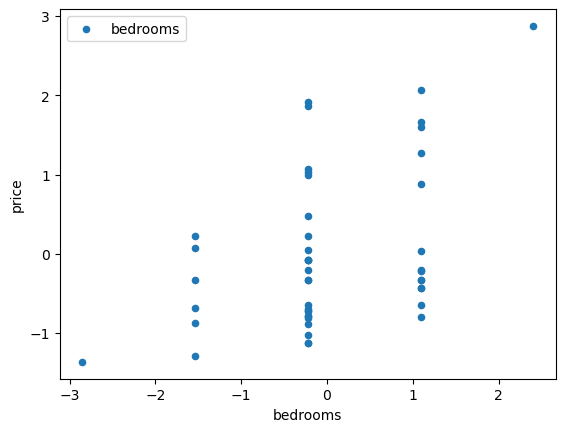

In [49]:
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

In [51]:
data.insert(0,'ones',1)


In [53]:
X=data.iloc[:,0:-1]
#第一个：前后表示行,第二个表示列。从第一列到最后一列切片,-1是指倒数第一列。

y=data.iloc[:,-1]


In [55]:
y=data.iloc[:,-1]


In [57]:
X=X.values
X.shape

(47, 3)

In [59]:
y=y.values
y.shape

(47,)

In [61]:
y=y.reshape(47,1)
y.shape

(47, 1)

In [63]:
def costFunction(X,y,theta):
    #创造函数，并传入参数。
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [65]:
theta=np.zeros((3,1))
theta.shape

(3, 1)

In [67]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.48936170212765967


In [69]:
def gradientDescent(X,y,theta,alpha,iters):
    costs=[]
    for i in range(iters):
        theta-=(X.T@(X@theta-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costs.append(cost)
    return theta,costs

In [71]:
alphas = [0.0003,0.003,0.03,0.0001,0.001,0.01]
iters=2000

In [73]:
fig,ax=plt.subplots()
#括号里面是行列,用，隔开。

for alpha in alphas:
    _,costs=gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)
    ax.legend()

ax.set(xlabel='iters',
       ylabel='cost',
       title='cost vs iters')
plt.show()